# How does it work?

The DBSCAN method is a little bit different than the other ones. This method assign the datapoints by "density" into 3 different sets:
* Core points
* Density-reachable
* Noise

The DBSCAN method has 2 parameters as inputs, we need to assign a number of datapoints $N$ and a maximum distance $\epsilon$ to consider (we will call this the region). As in other cases, we should also define how we will measure distance (Euclidean, Manhattan, Cosine etc...). Once we define this we define the 3 different as follows.

1. The core points are data points which have at least $N$ data points (counting itself) at its region. 
2. The Density-reachable are data points which have less than $N$ data points at its region but at least one core point inside the region.
3. Noise are data points that have less than $N% data points at its region and no core points either.

This way we assign clusters into the dataset. The advantage of this method is that we don't need to define a number of clusters and this method itself removes outliers. 

The disadvantage of this is that we need to find two optimal parameters. And this works badly with clusters of different density since they might need different $N$ and $\epsilon$ values.



Text(0.5, 1.0, 'Dataset with two features')

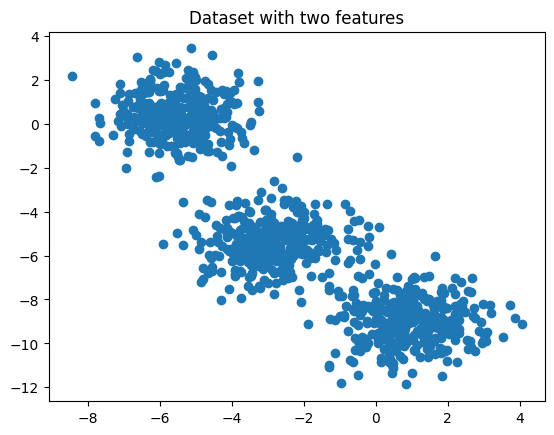

In [165]:
# Lets create a dataset from sklearn.datasets.make_blob
## Create sample dataset with sklearn 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1000
n_features = 2
n_classes = 3

data =  make_blobs(n_samples = n_samples, 
                   n_features = n_features, 
                   centers = n_classes,
                   random_state = 16)
feature_data = data[0]
plt.scatter(feature_data[:, 0], feature_data[:, 1])
plt.title('Dataset with two features')

We define a number of datapoints $N$ to consider a core point and an $\epsilon$ for this method we will use the euclidean distance but others can be used as well.

In [178]:
N = 11
epsilon = 0.75

Now we define a function that defines if the data point is a core point, density reachable or noise. Also we will return the neighbors if any

In [179]:
import numpy as np

def get_set(X, position, epsilon, N, categories):
    distances = np.linalg.norm((X - X[position]), axis = 1)
    inside_region = distances[distances < epsilon]
    inside_positions = np.where(distances < epsilon)[0]


    if len(inside_region) >= N:
        categories[position] = "C" # Core
        
    elif len(inside_region) < N and ("C" in categories[inside_positions]):
        categories[position] = "D" # Density Reachable
    else:
        categories[position] = "N" # Noise
    
    return inside_positions

Now we will start the algorithm:

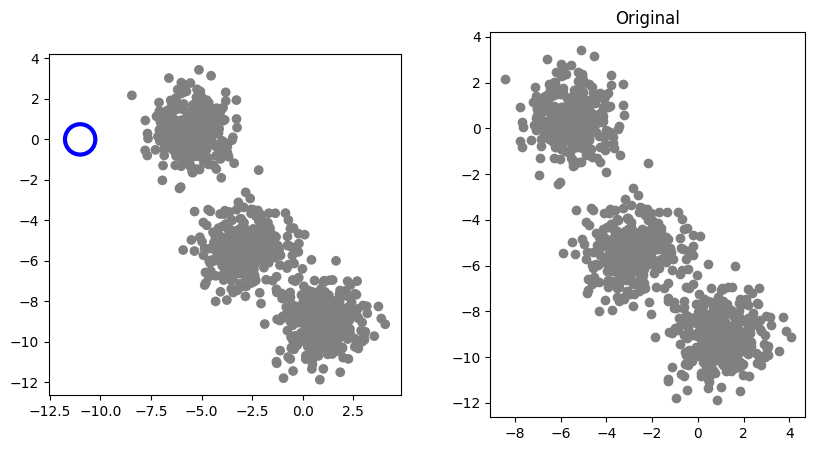

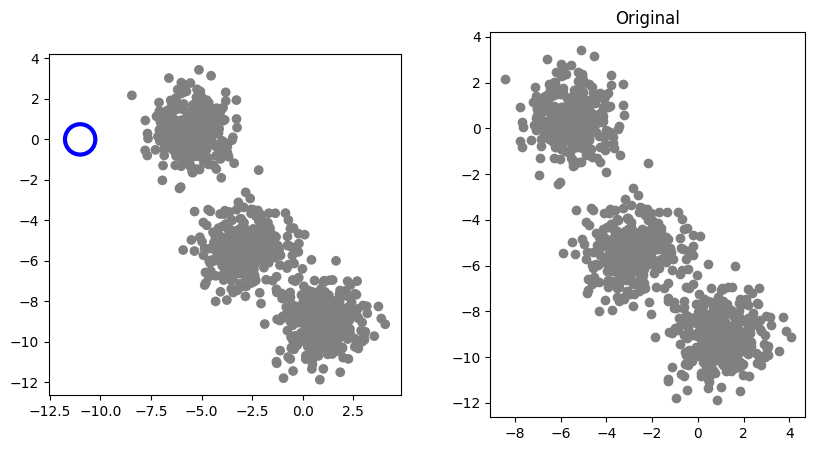

In [182]:
import time
from IPython.display import clear_output, display
import random 

n_rows = len(feature_data)
# Create a list of categories undefined
categories =np.array([""]*n_rows)
classes = np.full(n_rows, np.nan)
colors = np.full((n_rows, 4), 0.5)
colors[:, 3] = 1

# Create figure to plot the evolution of the model
plt.ion()  # Turn on interactive mode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Original figure
ax2.scatter(feature_data[:, 0], feature_data[:, 1], c = 'grey')
ax2.set_title('Original')
ax2.set_aspect('equal')
circle = plt.Circle((-11, 0), epsilon, color = "blue", fill = False, linewidth = 3)
ax1.add_patch(circle)
# Draw the left figure (this will change)

class_progress = ax1.scatter(feature_data[:, 0], feature_data[:, 1], c = colors)
ax1.set_aspect('equal')
display(fig)

cls = 0
while '' in categories:
    # Pick a datapoint at random
    position = random.choice(np.where(categories == '')[0])
    neigh_pos = get_set(feature_data, position, epsilon, N, categories)
    neigh_list = list(neigh_pos)
    # Color to label
    color = np.random.random(4)
    for neigh in neigh_list:
        if categories[neigh] == '':
            new_neigh = get_set(feature_data, neigh, epsilon, N, categories)
            if categories[neigh] == 'C':
                unique_neigh = np.setdiff1d(new_neigh, neigh_pos) # Find new neighbors to add into the for loop
                for jj in list(unique_neigh):
                    neigh_list.append(jj) # Append them
                classes[neigh] = cls # Set the class
                color[3] = 1 # Give full opacity
                colors[neigh] = color # Set color to data point
                
            elif categories[neigh] == 'D':
                classes[neigh] = cls
                color[3] = 0.5 # Give less opacity
                colors[neigh] = color # Set color to data point

        # Update the scatter with new classes
        class_progress.set_color(colors)
        clear_output(wait=True)
    
        display(fig)
        time.sleep(0.25)
    cls += 1 

    